In [77]:
import pandas as pd

In [78]:
data=pd.read_csv("/home/placement/Desktop/csv/fiat500.csv")

In [79]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [80]:
data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [82]:
data=data.drop(['ID','lat','lon'],axis=1)
data

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [83]:
data=data.loc[(data.model=='lounge')]
data

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
3,lounge,51,2739,160000,1,6000
6,lounge,51,731,11600,1,10750
7,lounge,51,1521,49076,1,9190
11,lounge,51,366,17500,1,10990
...,...,...,...,...,...,...
1528,lounge,51,2861,126000,1,5500
1529,lounge,51,731,22551,1,9900
1530,lounge,51,670,29000,1,10800
1534,lounge,74,3835,112000,1,4600


In [84]:
data.shape

(1094, 6)

In [85]:
data=pd.get_dummies(data)
data

,engine_power,age_in_days,km,previous_owners,price,model_lounge
0,51,882,25000,1,8900,1
3,51,2739,160000,1,6000,1
6,51,731,11600,1,10750,1
7,51,1521,49076,1,9190,1
11,51,366,17500,1,10990,1
...,...,...,...,...,...,...
1528,51,2861,126000,1,5500,1
1529,51,731,22551,1,9900,1
1530,51,670,29000,1,10800,1
1534,74,3835,112000,1,4600,1


In [86]:
data.shape

(1094, 6)

In [87]:
y=data['price']
x=data.drop(['price'],axis=1)

In [88]:
y

0        8900
3        6000
6       10750
7        9190
11      10990
        ...  
1528     5500
1529     9900
1530    10800
1534     4600
1536     5990
Name: price, Length: 1094, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [90]:
x_test.shape

(362, 5)

In [91]:
x_train.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge
441,51,762,36448,1,1
701,51,701,27100,1,1
695,51,3197,51083,1,1
1415,51,670,33000,1,1
404,51,456,14000,1,1


In [92]:
y_test

676     10250
215      9790
146      5500
1319     9900
1041     8900
        ...  
757      6000
167     10950
156      8000
1145    10700
1393     9400
Name: price, Length: 362, dtype: int64

In [93]:
y_test.head(5)

676     10250
215      9790
146      5500
1319     9900
1041     8900
Name: price, dtype: int64

In [94]:
y_train.head(5)

441      8980
701     10300
695      5880
1415    10490
404      9499
Name: price, dtype: int64

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)

/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.1816e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.23704e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18103e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21179e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [96]:
ridge_regressor.best_params_

{'alpha': 30}

In [97]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
ypred=ridge.predict(x_train)

In [101]:
from sklearn.metrics import r2_score
r2_score(y_train,ypred)

0.8390479384942983

In [102]:
from sklearn.metrics import mean_squared_error
Ridge_error=mean_squared_error(ypred,y_train)
Ridge_error

522784.6232726958

In [104]:
results=pd.DataFrame(columns=['Actual','predicted'])
results['Actual']=y_train
results['predicted']=ypred
results=results.reset_index()
results['ID']=results.index
results.head(15)

,index,Actual,predicted,ID
0,441,8980,9734.859218,0
1,701,10300,9952.620945,1
2,695,5880,7282.274039,2
3,1415,10490,9877.912191,3
4,404,9499,10401.767165,4
5,861,9800,9857.657067,5
6,384,10900,9760.448051,6
7,776,9850,10073.352493,7
8,345,9999,10480.803044,8
9,811,8900,9805.398922,9


<Axes: xlabel='ID', ylabel='Actual'>

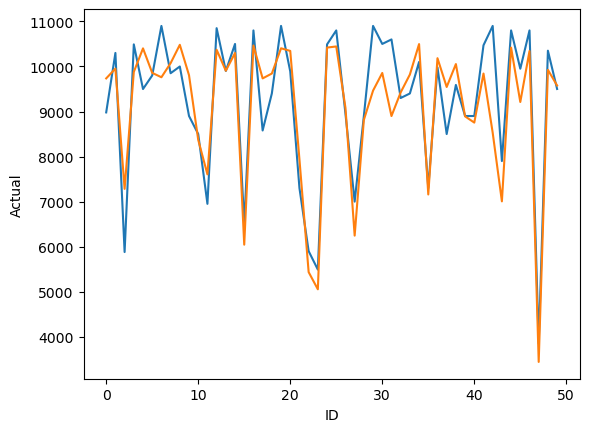

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID' ,y='Actual' ,data=results.head(50))
sns.lineplot(x='ID' ,y='predicted' ,data=results.head(50))